## Tutorial 5: *Dropout & Batch Normalization*

Use the *'red-wine'* dataset.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

from tensorflow import keras
from keras import layers, callbacks
from keras.callbacks import EarlyStopping

datapath = os.getcwd()+'/sample_data'


2024-11-19 19:33:53.723284: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

### Import and split up the data

In [13]:
red_wine = pd.read_csv(datapath+'/red-wine.csv')

red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [14]:
df_train = red_wine.sample(frac=0.70,
                           random_state=0)

df_valid = red_wine.copy().drop(df_train.index)


In [15]:
print(len(red_wine))
print()
print(len(df_train))
print()
print(len(df_valid))


1599

1119

480


In [16]:
display(df_train.head(5))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6
979,12.2,0.450,0.49,1.40,0.075,3.0,6.0,0.99690,3.13,0.63,10.4,5


In [17]:
target = 'quality'

X_train = df_train.drop(target, axis=1)
y_train = df_train[target]

X_valid = df_valid.drop(target, axis=1)
y_valid = df_valid[target]


### The Model with new layers

In [18]:
model = keras.Sequential([
    layers.Dense(1024, activation = 'relu', input_shape=[11]),
    
    layers.Dropout(rate=0.30),
    layers.BatchNormalization(),
    layers.Dense(1024, activation = 'relu'),

    layers.Dropout(rate=0.30),
    layers.BatchNormalization(),
    layers.Dense(1024, activation = 'relu'),
    
    layers.Dropout(rate=0.30),
    layers.BatchNormalization(),
    layers.Dense(1)
])


/home/rty10/miniconda3/envs/dnalab/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(optimizer='adam', loss='mae')


In [20]:
history = model.fit(
    X_train, y_train,
    validation_data = (X_valid, y_valid),
    batch_size=256,
    epochs=100,
    verbose=0)


<Axes: >

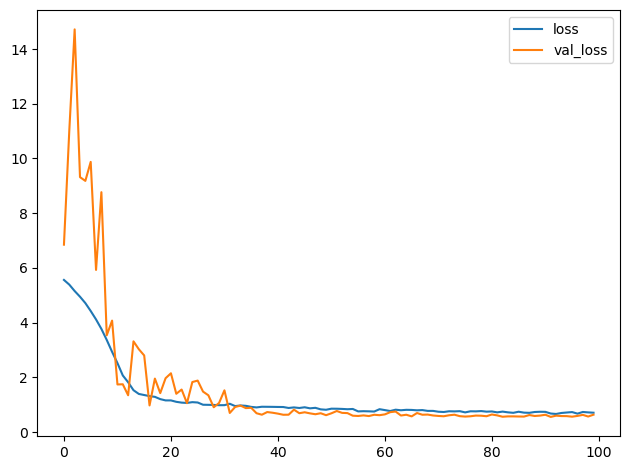

In [21]:
history_df = pd.DataFrame(history.history)

history_df.loc[:,['loss','val_loss']].plot()

